In [41]:
#dependencies
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# Import our input dataset
loan_df = pd.read_csv('/Users/vickylynnmauldin/Desktop/FHLMC-MF-Loan-Performance copy/cleaned_data_final2.csv')
loan_df

,cnt_mrtg_term,mrtg_status,rate_ltv,cd_fxfltr,cnt_blln_term,cnt_io_per,cnt_rsdntl_unit,code_int,rate_dcr,rate_int
0,120,1,0.77500,0,1,1,328.0,0.0,1.689556,0.043700
1,180,1,0.63194,0,1,1,352.0,0.0,1.646538,0.046100
2,84,1,0.74184,0,1,1,96.0,0.0,1.885526,0.041400
3,240,1,0.49444,1,1,0,30.0,0.0,1.353316,0.042100
4,120,1,0.69780,0,1,1,23.0,0.0,2.103800,0.043000
...,...,...,...,...,...,...,...,...,...,...
27958,180,1,0.70000,0,1,0,108.0,0.0,1.163198,0.043500
27959,120,1,0.74553,0,1,1,128.0,0.0,1.799744,0.049200
27960,84,1,0.68345,0,1,1,78.0,1.0,2.211049,0.039333
27961,120,1,0.63505,0,1,1,191.0,0.0,1.708517,0.042700


In [43]:
#drop target data 'mrtg_status'
X = loan_df.drop('mrtg_status', axis=1).values

#get variable data
y = loan_df['mrtg_status'].values


In [44]:
#split data into training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [46]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 64

#define model and layers
nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(hidden_nodes_layer1, activation="relu", input_dim = number_input_features),
    tf.keras.layers.Dense(hidden_nodes_layer2, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 80)                800       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                5184      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 6,049
Trainable params: 6,049
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [48]:
# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
700/700 [==============================] - 1s 544us/step - loss: 0.1570 - accuracy: 0.9340
Epoch 2/100
700/700 [==============================] - 0s 529us/step - loss: 0.0389 - accuracy: 0.9921
Epoch 3/100
700/700 [==============================] - 0s 535us/step - loss: 0.0368 - accuracy: 0.9930
Epoch 4/100
700/700 [==============================] - 0s 529us/step - loss: 0.0354 - accuracy: 0.9923
Epoch 5/100
700/700 [==============================] - 0s 526us/step - loss: 0.0337 - accuracy: 0.9929
Epoch 6/100
700/700 [==============================] - 0s 527us/step - loss: 0.0308 - accuracy: 0.9937
Epoch 7/100
700/700 [==============================] - 0s 540us/step - loss: 0.0333 - accuracy: 0.9933
Epoch 8/100
700/700 [==============================] - 0s 526us/step - loss: 0.0336 - accuracy: 0.9930
Epoch 9/100
700/700 [==============================] - 0s 527us/step - loss: 0.0354 - accuracy: 0.9924
Epoch 10/100
700/700 [==============================] - 0s 527us/step - l

700/700 [==============================] - 0s 527us/step - loss: 0.0250 - accuracy: 0.9937
Epoch 80/100
700/700 [==============================] - 0s 523us/step - loss: 0.0204 - accuracy: 0.9950
Epoch 81/100
700/700 [==============================] - 0s 532us/step - loss: 0.0222 - accuracy: 0.9947
Epoch 82/100
700/700 [==============================] - 0s 535us/step - loss: 0.0216 - accuracy: 0.9942
Epoch 83/100
700/700 [==============================] - 0s 538us/step - loss: 0.0210 - accuracy: 0.9946
Epoch 84/100
700/700 [==============================] - 0s 536us/step - loss: 0.0219 - accuracy: 0.9943
Epoch 85/100
700/700 [==============================] - 0s 535us/step - loss: 0.0211 - accuracy: 0.9948
Epoch 86/100
700/700 [==============================] - 0s 536us/step - loss: 0.0218 - accuracy: 0.9942
Epoch 87/100
700/700 [==============================] - 0s 535us/step - loss: 0.0214 - accuracy: 0.9948
Epoch 88/100
700/700 [==============================] - 0s 538us/step - loss:

In [49]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

175/175 - 0s - loss: 0.0449 - accuracy: 0.9911
Loss: 0.04488689824938774, Accuracy: 0.9910602569580078


In [50]:
matrix = loan_df.corr()
matrix

,cnt_mrtg_term,mrtg_status,rate_ltv,cd_fxfltr,cnt_blln_term,cnt_io_per,cnt_rsdntl_unit,code_int,rate_dcr,rate_int
cnt_mrtg_term,1.000000,-0.036914,-0.038570,0.848682,-0.181226,-0.188930,-0.302904,-0.205851,-0.094934,0.021476
mrtg_status,-0.036914,1.000000,-0.029372,-0.087967,0.021928,0.028454,0.016733,0.016023,0.035082,-0.084369
rate_ltv,-0.038570,-0.029372,1.000000,-0.024999,0.158240,0.114843,0.008196,0.013163,-0.364074,-0.019282
cd_fxfltr,0.848682,-0.087967,-0.024999,1.000000,-0.001018,-0.147497,-0.343636,-0.170554,-0.110538,-0.058226
cnt_blln_term,-0.181226,0.021928,0.158240,-0.001018,1.000000,0.127676,-0.001948,0.028048,-0.023061,-0.034883
cnt_io_per,-0.188930,0.028454,0.114843,-0.147497,0.127676,1.000000,0.195325,0.194197,0.342681,-0.152717
cnt_rsdntl_unit,-0.302904,0.016733,0.008196,-0.343636,-0.001948,0.195325,1.000000,0.156306,0.131353,-0.005001
code_int,-0.205851,0.016023,0.013163,-0.170554,0.028048,0.194197,0.156306,1.000000,0.154514,-0.222921
rate_dcr,-0.094934,0.035082,-0.364074,-0.110538,-0.023061,0.342681,0.131353,0.154514,1.000000,-0.289637
rate_int,0.021476,-0.084369,-0.019282,-0.058226,-0.034883,-0.152717,-0.005001,-0.222921,-0.289637,1.000000


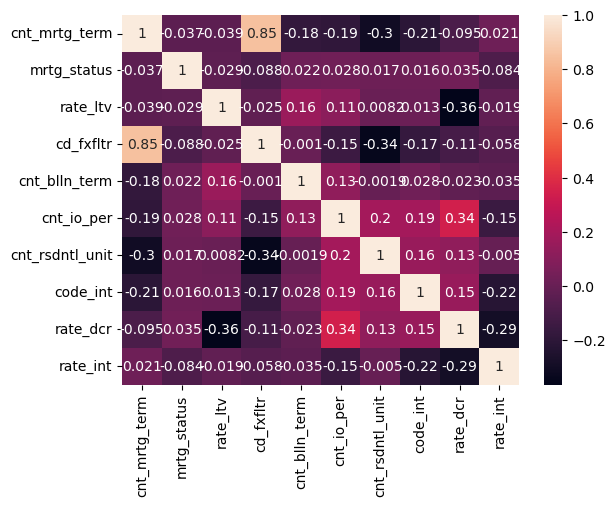

In [51]:
#Plot a Heat map Correlation Matrix
#https://datagy.io/python-correlation-matrix/
#https://www.statology.org/correlation-matrix-python/
sns.heatmap(matrix, annot=True)
plt.show()

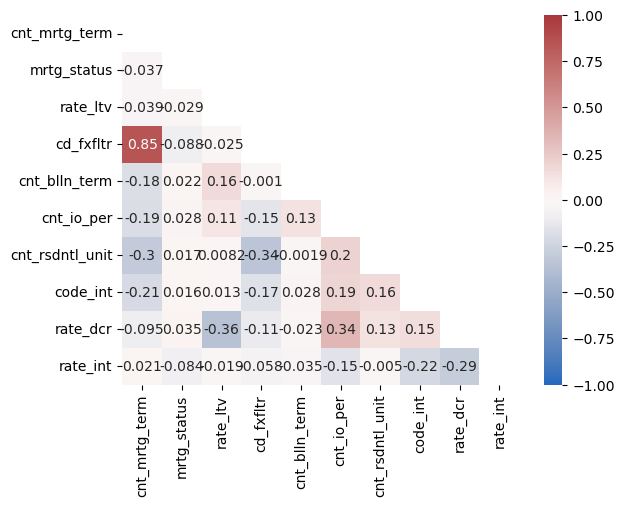

In [52]:
#Plot Only the Lower Half of a Correlation
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [53]:
#Selecting Only Strong Correlations in a Correlation Matrix
matrix = matrix.unstack()
matrix = matrix[abs(matrix) >= 0.7]

print(matrix)

cnt_mrtg_term    cnt_mrtg_term      1.000000
                 cd_fxfltr          0.848682
mrtg_status      mrtg_status        1.000000
rate_ltv         rate_ltv           1.000000
cd_fxfltr        cnt_mrtg_term      0.848682
                 cd_fxfltr          1.000000
cnt_blln_term    cnt_blln_term      1.000000
cnt_io_per       cnt_io_per         1.000000
cnt_rsdntl_unit  cnt_rsdntl_unit    1.000000
code_int         code_int           1.000000
rate_dcr         rate_dcr           1.000000
rate_int         rate_int           1.000000
dtype: float64


In [54]:
loan_df.columns

Index(['cnt_mrtg_term', 'mrtg_status', 'rate_ltv', 'cd_fxfltr',
       'cnt_blln_term', 'cnt_io_per', 'cnt_rsdntl_unit', 'code_int',
       'rate_dcr', 'rate_int'],
      dtype='object')

In [55]:
#fixed loan = 1 float loan = 0
loan_df

,cnt_mrtg_term,mrtg_status,rate_ltv,cd_fxfltr,cnt_blln_term,cnt_io_per,cnt_rsdntl_unit,code_int,rate_dcr,rate_int
0,120,1,0.77500,0,1,1,328.0,0.0,1.689556,0.043700
1,180,1,0.63194,0,1,1,352.0,0.0,1.646538,0.046100
2,84,1,0.74184,0,1,1,96.0,0.0,1.885526,0.041400
3,240,1,0.49444,1,1,0,30.0,0.0,1.353316,0.042100
4,120,1,0.69780,0,1,1,23.0,0.0,2.103800,0.043000
...,...,...,...,...,...,...,...,...,...,...
27958,180,1,0.70000,0,1,0,108.0,0.0,1.163198,0.043500
27959,120,1,0.74553,0,1,1,128.0,0.0,1.799744,0.049200
27960,84,1,0.68345,0,1,1,78.0,1.0,2.211049,0.039333
27961,120,1,0.63505,0,1,1,191.0,0.0,1.708517,0.042700


# Fixed loan only cd_fxfltr = 1 if loan is fixed 

In [56]:
fixed = loan_df[loan_df['cd_fxfltr'] == 1]
fixed

,cnt_mrtg_term,mrtg_status,rate_ltv,cd_fxfltr,cnt_blln_term,cnt_io_per,cnt_rsdntl_unit,code_int,rate_dcr,rate_int
3,240,1,0.49444,1,1,0,30.0,0.0,1.353316,0.0421
6,240,1,0.71564,1,1,1,26.0,0.0,1.845014,0.0385
10,240,1,0.50286,1,1,0,54.0,0.0,1.978046,0.0367
20,240,1,0.74968,1,1,0,27.0,0.0,1.351742,0.0351
24,240,1,0.54054,1,1,1,10.0,0.0,2.407605,0.0321
...,...,...,...,...,...,...,...,...,...,...
27943,240,1,0.79040,1,1,1,31.0,0.0,2.351692,0.0433
27948,240,1,0.73923,1,1,0,9.0,0.0,1.215033,0.0452
27954,240,1,0.78873,1,1,1,40.0,0.0,2.217486,0.0289
27956,240,1,0.37037,1,1,1,10.0,0.0,2.615118,0.0343


In [60]:
#fixed.to_csv('fixed.csv', index= False)

# Float loan only cd_fxfltr = 0 if loan is float 

In [61]:
float_loan = loan_df[loan_df['cd_fxfltr'] == 0]
float_loan

,cnt_mrtg_term,mrtg_status,rate_ltv,cd_fxfltr,cnt_blln_term,cnt_io_per,cnt_rsdntl_unit,code_int,rate_dcr,rate_int
0,120,1,0.77500,0,1,1,328.0,0.0,1.689556,0.043700
1,180,1,0.63194,0,1,1,352.0,0.0,1.646538,0.046100
2,84,1,0.74184,0,1,1,96.0,0.0,1.885526,0.041400
4,120,1,0.69780,0,1,1,23.0,0.0,2.103800,0.043000
5,120,1,0.64036,0,1,1,116.0,0.0,1.842235,0.043600
...,...,...,...,...,...,...,...,...,...,...
27958,180,1,0.70000,0,1,0,108.0,0.0,1.163198,0.043500
27959,120,1,0.74553,0,1,1,128.0,0.0,1.799744,0.049200
27960,84,1,0.68345,0,1,1,78.0,1.0,2.211049,0.039333
27961,120,1,0.63505,0,1,1,191.0,0.0,1.708517,0.042700


In [62]:
#float_loan.to_csv('float.csv', index= False)

# Trying to figure out Cross-Validation Scores

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
model_regress = LogisticRegression()

# Perform k-fold cross-validation
num_folds = 10  # Number of folds
scores = cross_val_score(model_regress, X_test_scaled,y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.99285714 0.99107143 0.99464286 0.99284436 0.99105546 0.99105546
 0.99284436 0.99105546 0.99105546 0.99105546]
Mean Score: 0.9919537439304882
Standard Deviation: 0.0012019549045592418
